This will plot already generated figures for exploration.

In [1]:
# savefiles
fullproc_r = '/Users/jnaiman/LMM_Figure_Parsing/resources/'

# get title and x/y labels from most frequent words
data_dir = '/Users/jnaiman/LMM_Figure_Parsing/resources/data/'

# save small bits of data?
save_small_dir = '/Users/jnaiman/LMM_Figure_Parsing/small_data_save/'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
from glob import glob
import json
from pixel_location_utils import plot_color_bar

 ------ Plot #0 ------ 
Plot type:line
Distribution:linear

 ------ Plot #1 ------ 
Plot type:scatter
Distribution:linear
  n_clusters = 3

 ------ Plot #2 ------ 
Plot type:scatter
Distribution:linear
  n_clusters = 4

 ------ Plot #3 ------ 
Plot type:histogram
Distribution:linear
m * x + b: m & b = -4.540186390925426 & 27.670615419964896

 ------ Plot #4 ------ 
Plot type:histogram
Distribution:linear
m * x + b: m & b = 0.22375587771812144 & -95.59826479732894

 ------ Plot #5 ------ 
Plot type:line
Distribution:linear

 ------ Plot #6 ------ 
Plot type:histogram
Distribution:linear
  n_clusters = 6

 ------ Plot #7 ------ 
Plot type:line
Distribution:linear

 ------ Plot #8 ------ 
Plot type:scatter
Distribution:linear

 ------ Plot #9 ------ 
Plot type:contour
Distribution:linear

 ------ Plot #10 ------ 
Plot type:line
Distribution:linear

 ------ Plot #11 ------ 
Plot type:line
Distribution:linear

 ------ Plot #12 ------ 
Plot type:histogram
Distribution:linear
m * x + b: m & b

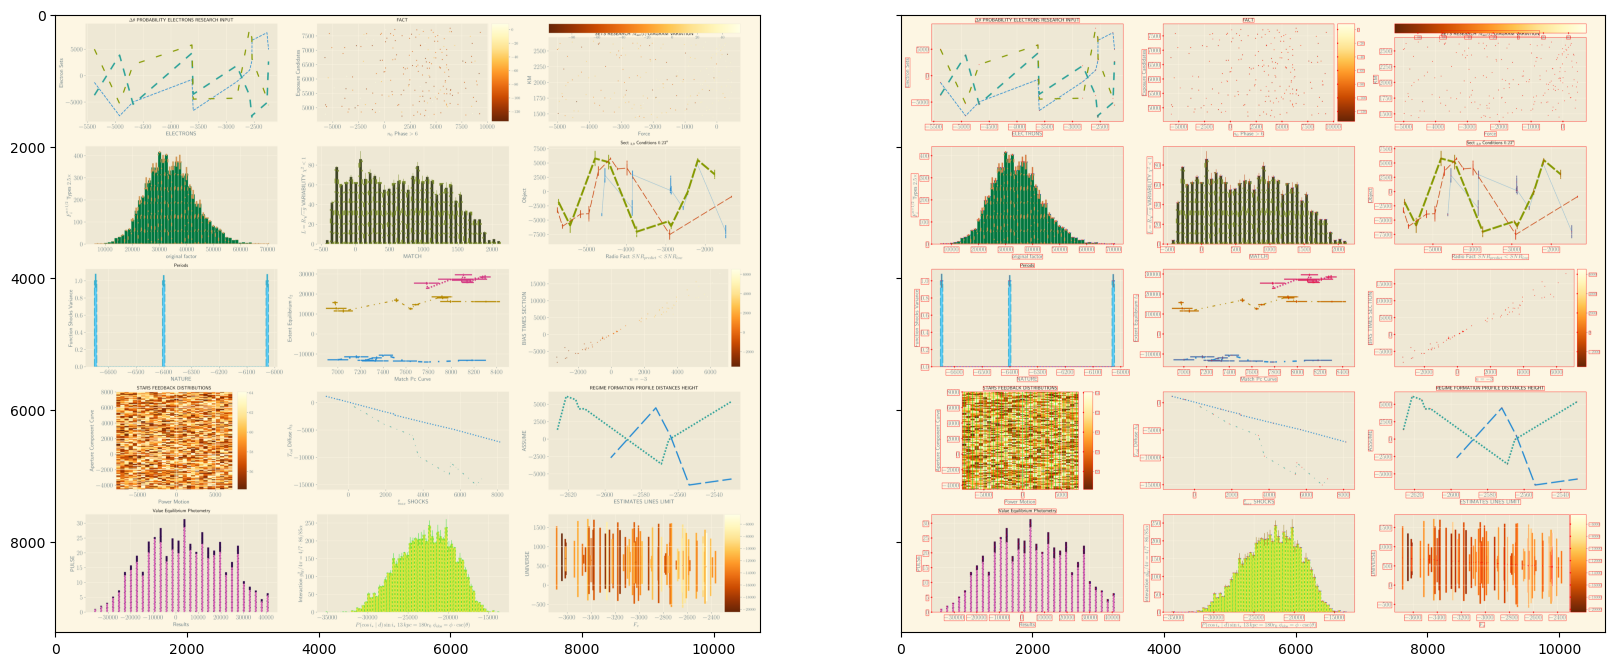

In [23]:
#%matplotlib widget
%matplotlib inline



plt.close('all')

csize = 5

ifig = 1 # which one to plot?


img = np.array(Image.open(save_small_dir+'Picture'+str(ifig+1)+'.png').convert('RGB'))
with open(save_small_dir+'Picture'+str(ifig+1)+'.json','r') as f:
    datas_plot1 = json.load(f) # weirdness
    datas_plot = json.loads(datas_plot1)
imgplot = img.copy()


iplot_count = 0
for p,v in datas_plot.items():
    iplot_count += 1
    if 'plot' in p: # not figure stuffs... just yet
        out_string = ' ------ Plot #' + str(p.split('plot')[-1]) + ' ------ \n'
        out_string += 'Plot type:' + v['type'] + '\n'
        out_string += 'Distribution:' + v['distribution'] + '\n'
        if 'data params' in v['data']:
            if 'nclusters' in v['data']['data params']:
                out_string += '  n_clusters = ' + str(v['data']['data params']['nclusters']) + '\n'
            if 'm1' in v['data']['data params']:
                out_string += 'm_1 * x + b_1: m_1 & b_1 = ' + str(v['data']['data params']['m1']) + \
                  ' & ' + str(v['data']['data params']['a1']) + '\n'
            if 'm2' in v['data']['data params']:
                out_string += 'm_2 * y + b_2: m_2 & b_2 = ' + str(v['data']['data params']['m2']) + \
                  ' & ' + str(v['data']['data params']['a2']) + '\n'
            if 'm' in v['data']['data params'] and 'a' in v['data']['data params']:
                out_string += 'm * x + b: m & b = ' + str(v['data']['data params']['m']) + \
                  ' & ' + str(v['data']['data params']['a']) + '\n'
        print(out_string)
        
        # square
        d = v['square']
        xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
        xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
        cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
        # title bounding box
        if 'title' in v: # has a title?
            d = v['title']
            xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
            xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
            cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
        # xlabel bounding box
        d = v['xlabel']
        xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
        xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
        cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
        # ylabel bounding box
        d = v['ylabel']
        xmin,ymin = int(d['xmin']),int(img.shape[0]-d['ymin'])
        xmax,ymax = int(d['xmax']),int(img.shape[0]-d['ymax'])
        cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)

        #print('PLOT:', p)
        if v['type'] == 'line':
            xs = v['data pixels']['xs']
            ys = v['data pixels']['ys']
            for xx,yy in zip(xs,ys):
                for x,y in zip(xx,yy):
                    cv.circle(imgplot, (int(x), int(y)), csize, (255,0,0), -1)
        elif v['type'] == 'scatter':
            xs = v['data pixels']['xs']
            ys = v['data pixels']['ys']
            for x,y in zip(xs,ys):
                cv.circle(imgplot, (int(x), int(y)), csize, (255,0,0), -1)
            # colorbar
            if 'color bar' in v:
                imgplot = plot_color_bar(v,img,imgplot)
        elif v['type'] == 'histogram':
            # middle of bar
            xs = np.array(v['data pixels']['xs'])
            ys = np.array(v['data pixels']['ys'])
            for x,y in zip(xs,ys): # middle
                cv.circle(imgplot, (int(x), int(y)), csize, (255,0,0), -1)
            # right
            xsr = np.array(v['data pixels']['xs_right'])
            ysr = np.array(v['data pixels']['ys_right'])
            for x,y in zip(xsr,ysr): # right
                cv.circle(imgplot, (int(x), int(y)), csize, (0,0,255), -1)
            # left
            xsl = np.array(v['data pixels']['xs_left'])
            ysl = np.array(v['data pixels']['ys_left'])
            for x,y in zip(xsl,ysl): # left
                cv.circle(imgplot, (int(x), int(y)), csize, (255,0,125), -1)
        elif v['type'] == 'contour':
            #xs = np.array
            #xs = []; ys = []
            #if 'image' in v['data pixels']:
            if v['data pixels']['image'] != {}:
                xs = v['data pixels']['image']['xsc']
                ys = v['data pixels']['image']['ysc']
                #print('image')
                #print(xs[:10], ys[:10])
                for x,y in zip(xs,ys):
                    #print(x,y)
                    cv.circle(imgplot, (int(x), int(y)), csize, (0,255,0), -1)
            #if 'contour' in v['data pixels']:
            if v['data pixels']['contour'] != {}:
                xs = v['data pixels']['contour']['xs']
                ys = v['data pixels']['contour']['ys']
                #print('contour')
                #print(xs[:10], ys[:10])
                for x,y in zip(xs,ys):
                    #print(x,y)
                    cv.circle(imgplot, (int(x), int(y)), csize, (0,255,255), -1)
            if 'color bar' in v:
                #print('ding')
                imgplot = plot_color_bar(v,img,imgplot)
            
        else:
            print('no idea how to deal!')
            import sys; sys.exit()

        # these are things for every plot
        for d in v['xticks']: # draw x-ticks
            xmin,ymin,xmax,ymax = int(d['xmin']),int(img.shape[0]-d['ymin']),int(d['xmax']),int(img.shape[0]-d['ymax'])
            if d['tx']>=v['square']['xmin'] and d['tx']<=v['square']['xmax']:
                cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
            # also ticks
            if d['tx']>=v['square']['xmin'] and d['tx']<=v['square']['xmax']:
                cv.circle(imgplot, (int(d['tx']), int(img.shape[0]-d['ty'])), 10, (255,0,0), -1)
        for d in v['yticks']: # draw y-ticks
            xmin,ymin,xmax,ymax = int(d['xmin']),int(img.shape[0]-d['ymin']),int(d['xmax']),int(img.shape[0]-d['ymax'])
            if d['ty']>=v['square']['ymin'] and d['ty']<=v['square']['ymax']:
                cv.rectangle(imgplot, (xmin,ymin), (xmax,ymax), (255, 0, 0), 3)
            if d['ty']>=v['square']['ymin'] and d['ty']<=v['square']['ymax']:
                cv.circle(imgplot, (int(d['tx']), int(img.shape[0]-d['ty'])), 10, (255,0,0), -1)
        if v['type'] == 'line':
            if 'x error bars' in v['data pixels']:
                for il,l in enumerate(v['data pixels']['x error bars']):
                    for ie,(xmin,ymin,xmax,ymax) in enumerate(l):
                        xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                        xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                        # only take parts within square
                        xmin = max(xmin,int(round(v['square']['xmin'])))
                        xmax = min(xmax,int(round(v['square']['xmax'])))
                        ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                        ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                        cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
            if 'y error bars' in v['data pixels']:
                for l in v['data pixels']['y error bars']:
                    for xmin,ymin,xmax,ymax in l:
                        xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                        xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                        # only take parts within square
                        xmin = max(xmin,int(round(v['square']['xmin'])))
                        xmax = min(xmax,int(round(v['square']['xmax'])))
                        ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                        ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                        cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
        elif v['type'] == 'scatter' or v['type'] == 'histogram':
            if 'x error bars' in v['data pixels']:
                for xmin,ymin,xmax,ymax in v['data pixels']['x error bars']:
                    xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                    xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                    # only take parts within square
                    xmin = max(xmin,int(round(v['square']['xmin'])))
                    xmax = min(xmax,int(round(v['square']['xmax'])))
                    ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                    ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                    cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
            if 'y error bars' in v['data pixels']:
                for xmin,ymin,xmax,ymax in v['data pixels']['y error bars']:
                    #print(ymin,ymax)
                    xmin,ymin = int(round(xmin)),int(round(img.shape[0]-ymin))
                    xmax,ymax = int(round(xmax)),int(round(img.shape[0]-ymax))
                    xmin = max(xmin,int(round(v['square']['xmin'])))
                    xmax = min(xmax,int(round(v['square']['xmax'])))
                    ymin = max(ymin,int(round(img.shape[0]-v['square']['ymax'])))
                    ymax = min(ymax,int(round(img.shape[0]-v['square']['ymin'])))
                    cv.line(imgplot, (xmin,ymin),(xmax,ymax), (255,0,0), 2)
                    #print('')

fig2,ax2 = plt.subplots(1,2,figsize=(20,20), sharex=True, sharey=True) # inline
#fig2,ax2 = plt.subplots(1,2,figsize=(15,10), sharex=True, sharey=True) # widget
ax2[0].imshow(img)
ax2[1].imshow(imgplot)
plt.show()


In [6]:
datas_plot['plot0'].keys()

dict_keys(['type', 'distribution', 'data', 'data pixels', 'data from plot', 'xticks', 'yticks', 'square', 'title', 'xlabel', 'ylabel'])

In [14]:
datas_plot['plot0']['data'].keys()

dict_keys(['xs', 'ys', 'colors', 'data params'])

In [15]:
datas_plot['plot0']['data']['data params']

{'nsamples': 341,
 'nclusters': 4,
 'centers': [[-7569.594706311305, -2451.4224082180535],
  [-3200.320179205444, -1977.2915673675468],
  [-5397.191993968526, -2993.9215778997245],
  [-5893.679996379952, -2031.2979229545788]],
 'cluster_std': [[0.6160339308295579, 0.2171131421660748],
  [0.26935351281881975, 0.11331406120967756],
  [2.084525212018543, 1.070620240202566],
  [0.8850472448305216, 1.6324790629388346]],
 'noise level': 0.23509203601734158}

In [18]:
datas_plot['plot0']['type'], datas_plot['plot0']['distribution']

('scatter', 'gmm')